# **Example: Total Flux Plot**

This file demonstrates how to use MUTE to calculate and plot total underground fluxes for flat overburdens and mountains using DAEMONFLUX as the surface flux model.

## Import Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import mute.constants as mtc
import mute.underground as mtu

*************************************************************************
*                                                                       *
*                ███████████████████████████████████████                *
*                ▓  ▓▓▓▓  ▓▓  ▓▓▓▓  ▓▓        ▓▓       ▓                *
*                ▓   ▓▓   ▓▓  ▓▓▓▓  ▓▓▓▓▓  ▓▓▓▓▓  ▓▓▓▓▓▓                *
*                ▒        ▒▒  ▒▒▒▒  ▒▒▒▒▒  ▒▒▒▒▒       ▒                *
*                ▒  ▒  ▒  ▒▒  ▒▒▒▒  ▒▒▒▒▒  ▒▒▒▒▒  ▒▒▒▒▒▒                *
*                ░  ░░░░  ░░░░    ░░░░░░░  ░░░░░       ░                *
*                ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░                *
*                   https://github.com/wjwoodley/mute                   *
*                                                                       *
* Author:  William Woodley                                              *
* Version: 3.0.0                                                        *
*                                     

## Set the Global Constants

In [2]:
mtc.set_verbose(0)
mtc.set_output(False)
mtc.set_lab("Example")
mtc.set_n_muon(1000000)

## Calculate the Flux Curve

Calculate a general total underground flux curve to be drawn through the points.

In [3]:
mtc.set_overburden("flat")

depths       = np.arange(0.5, 7.1, 0.5)
u_tot_fluxes = []

for h in range(len(depths)):

    mtc.set_vertical_depth(depths[h])
    u_tot_fluxes.append(mtu.calc_u_tot_flux(model = "daemonflux"))

## Calculate Points for Flat Overburdens

Calculate values for specific underground labs under flat overburdens. References for the depths used here are given in https://inspirehep.net/literature/2799258.

In [4]:
mtc.set_overburden("flat")

flat_u_tot_fluxes = []

flat_labs      = ["WIPP", "Soudan", "Boulby", "SUPL", "SURF", "SNOLAB"]
flat_media     = ["salt", "rock",   "rock",   "rock", "rock", "rock"]
flat_densities = [2.3,    2.85,     2.62,     2.65,   2.86,   2.83]
flat_depths    = [1.507,  2.032,    2.803,    2.929,  4.227,  5.920]
flat_ev_depths = [1.54,   2.07,     2.83,     2.93,   4.38,   6.13]

for i in range(len(flat_labs)):

    mtc.set_medium(flat_media[i])
    mtc.set_reference_density(flat_densities[i])
    mtc.set_vertical_depth(flat_depths[i])
    
    flat_u_tot_fluxes.append(mtu.calc_u_tot_flux(model = "daemonflux"))

## Calculate Points for Mountains

Calculate values for specific underground labs under mountains. See [``Tutorial_Labs``](../docs/Tutorial_Labs.md) for more information.

In [5]:
mtc.set_overburden("mountain")

mountain_u_tot_fluxes = []
mountain_ev_depths    = []

mountain_labs      = ["Y2L",      "SuperK", "KamLAND", "LNGS", "LSM",         "CJPL"]
mountain_media     = ["y2l_rock", "rock",   "rock",    "rock", "frejus_rock", "rock"]
mountain_densities = [2.7,        2.7,      2.7,       2.72,   2.73,          2.8]

for i in range(len(mountain_labs)):

    mtc.set_medium(mountain_media[i])
    mtc.set_reference_density(mountain_densities[i])
    mtc.load_mountain(mountain_labs[i])
    
    mountain_u_tot_fluxes.append(mtu.calc_u_tot_flux(model = "daemonflux"))
    mountain_ev_depths.append(mtu.calc_depth(kind = "ev", model = "daemonflux"))

## Plot the Results

Plot the total underground flux curve and points against (equivalent) vertical depth.

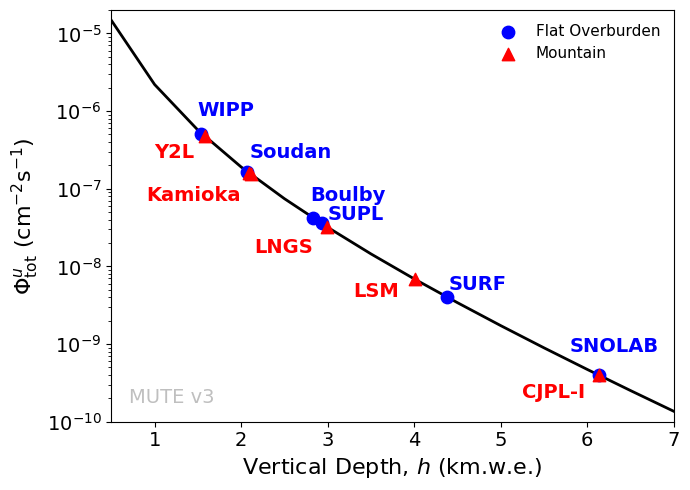

In [6]:
fig = plt.figure(figsize = (7, 5))
ax  = fig.add_subplot(111)

ax.semilogy(depths, u_tot_fluxes, color = "black", lw = 2, zorder = 0)

fontsize = 14

# Flat overburden points and labels

ax.scatter(flat_ev_depths, flat_u_tot_fluxes, color = "blue", s = 80, marker = "o", zorder = 1, label = "Flat Overburden")
ax.text(1.5, 8.7e-7, "WIPP", color = "blue", fontweight = "bold", fontsize = fontsize)
ax.text(2.1, 2.5e-7, "Soudan", color = "blue", fontweight = "bold", fontsize = fontsize)
ax.text(2.8, 7e-8, "Boulby", color = "blue", fontweight = "bold", fontsize = fontsize)
ax.text(3, 4e-8, "SUPL", color = "blue", fontweight = "bold", fontsize = fontsize)
ax.text(4.4, 5e-9, "SURF", color = "blue", fontweight = "bold", fontsize = fontsize)
ax.text(5.8, 8e-10, "SNOLAB", color = "blue", fontweight = "bold", fontsize = fontsize)

# Mountain points and labels

ax.scatter(mountain_ev_depths, mountain_u_tot_fluxes, color = "red", s = 80, marker = "^", zorder = 2, label = "Mountain")
ax.text(1, 2.5e-7, "Y2L", color = "red", fontweight = "bold", fontsize = fontsize)
ax.text(0.9, 7e-8, "Kamioka", color = "red", fontweight = "bold", fontsize = fontsize)
ax.text(2.15, 1.5e-8, "LNGS", color = "red", fontweight = "bold", fontsize = fontsize)
ax.text(3.3, 4e-9, "LSM", color = "red", fontweight = "bold", fontsize = fontsize)
ax.text(5.25, 2e-10, "CJPL-I", color = "red", fontweight = "bold", fontsize = fontsize)

# Adjust the plot parameters

ax.text(0.7, 1.75e-10, "MUTE v3", color = "grey", fontsize = 14, alpha = 0.5)
ax.set_xlabel(r"Vertical Depth, $h$ (km.w.e.)", fontsize = 16)
ax.set_ylabel(r"$\Phi^u_{\mathrm{tot}}$ (cm$^{-2}$s$^{-1}$)", fontsize = 16)
ax.tick_params(axis = "both", which = "major", labelsize = 14)
ax.set_xlim([0.5, 7])
ax.set_ylim([1e-10, 2e-5])

# Show the plot

plt.legend(loc = "upper right", frameon = False, fontsize = 11)
plt.tight_layout()
# plt.savefig("total_underground_flux.png", bbox_inches = "tight")
plt.show()